In [6]:
import numpy as np
import pandas as pd
import matplotl`ib.pyplot as plt
import statsmodels.api as sm
import math as mt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Read csv dataset
df = pd.read_csv("ProjectData.csv")
#Print 1st 10 rows
print(df.head(10))



       Country  Year      Status  New Status  Life expectancy  \
0  Afghanistan  2015  Developing           2              NaN   
1  Afghanistan  2014  Developing           2              NaN   
2  Afghanistan  2014  Developing           2              NaN   
3  Afghanistan  2013  Developing           2              NaN   
4  Afghanistan  2012  Developing           2              NaN   
5  Afghanistan  2011  Developing           2              NaN   
6      Albania  2015  Developing           2             77.8   
7      Albania  2014  Developing           2             77.5   
8      Albania  2013  Developing           2             77.2   
9      Albania  2012  Developing           2             76.9   

   Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0              263             62     0.01               71.279624   
1              271             64     0.01               73.523582   
2              271             64     0.01               73.523582   
3   

In [7]:
df.shape

(916, 23)

In [8]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [3]:
df = df.drop_duplicates(subset=['Country', 'Year'], keep='first', ignore_index=True)
print(df.head(10))

       Country  Year      Status  New Status  Life expectancy  \
0  Afghanistan  2015  Developing           2              NaN   
1  Afghanistan  2014  Developing           2              NaN   
2  Afghanistan  2013  Developing           2              NaN   
3  Afghanistan  2012  Developing           2              NaN   
4  Afghanistan  2011  Developing           2              NaN   
5      Albania  2015  Developing           2             77.8   
6      Albania  2014  Developing           2             77.5   
7      Albania  2013  Developing           2             77.2   
8      Albania  2012  Developing           2             76.9   
9      Albania  2011  Developing           2             76.6   

   Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0              263             62     0.01               71.279624   
1              271             64     0.01               73.523582   
2              268             66      NaN               73.219243   
3   

In [12]:
#Calculate mean values grouped by Country, required for data clean up
countryWiseMean = df.groupby(['Country']).mean()
print(countryWiseMean)


                                           Year  New Status  Life expectancy  \
Country                                                                        
Afghanistan                         2013.166667         2.0              NaN   
Albania                             2013.000000         2.0            77.20   
Algeria                             2013.000000         2.0            75.26   
Angola                              2013.000000         2.0            52.44   
Antigua and Barbuda                 2013.000000         2.0            76.06   
...                                         ...         ...              ...   
Venezuela (Bolivarian Republic of)  2013.000000         2.0            73.86   
Viet Nam                            2013.000000         2.0            75.72   
Yemen                               2013.000000         2.0            65.16   
Zambia                              2013.000000         2.0            60.66   
Zimbabwe                            2013

In [13]:
#Calculate mean values grouped by Status, required for data clean up
statusWiseMean = df.groupby(['New Status']).mean()
print(statusWiseMean)

                   Year  Life expectancy  Adult Mortality  infant deaths  \
New Status                                                                 
1           2013.000000        80.735625        70.543750       0.543750   
2           2013.001323        69.226133       168.342593      30.513228   

             Alcohol  percentage expenditure  Hepatitis B      Measles  \
New Status                                                               
1           9.239632             2638.018040    88.466667   299.068750   
2           3.036598              390.777282    82.262162  1892.435185   

                  BMI  under-five deaths      Polio  Total expenditure  \
New Status                                                               
1           52.725625           0.975000  94.912500          10.890930   
2           38.367694          41.228836  66.299595           8.513411   

            Diphtheria   HIV/AIDS           GDP    Population  \
New Status                          

In [19]:
#Fill up missing values (NaN) with respect to Status column
#e.g., out of 5 rows for a Country, if all values are NaN, then fill the missing values by mean value depending upon Status
for countryKey, countryRow in countryWiseMean.iterrows(): #Loop over countryWiseMean
  for colKey, colVal in countryRow.iteritems(): #Loop over columns of the current row
    if(mt.isnan(colVal)): #Check if the column has missing value, i.e., NaN
      for statusKey, statusRow in statusWiseMean.iterrows():  #Loop over statusWiseMean
        if(statusKey == countryRow['New Status']):  #Check if the country's status matches with current status
          countryRow[colKey] = statusRow[colKey]; #Fill value onto the countryRow's column
      
print(countryWiseMean)

                                           Year  New Status  Life expectancy  \
Country                                                                        
Afghanistan                         2013.166667         2.0        69.226133   
Albania                             2013.000000         2.0        77.200000   
Algeria                             2013.000000         2.0        75.260000   
Angola                              2013.000000         2.0        52.440000   
Antigua and Barbuda                 2013.000000         2.0        76.060000   
...                                         ...         ...              ...   
Venezuela (Bolivarian Republic of)  2013.000000         2.0        73.860000   
Viet Nam                            2013.000000         2.0        75.720000   
Yemen                               2013.000000         2.0        65.160000   
Zambia                              2013.000000         2.0        60.660000   
Zimbabwe                            2013

In [20]:
#Fill up missing values (NaN) with respect to Country column
#e.g., out of 5 rows, if 3 have values and 2 don't, then fill the missing values by mean of the first 3 rows
for countryKey, countryRow in countryWiseMean.iterrows(): #Loop over countryWiseMean
  for index, dfRow in df.iterrows(): #Loop over dataframe
    if(dfRow[0] == countryKey): #Check if 1st column of dataframe which is country name, matches with the grouped key
      for i in range(3, len(dfRow)): #Loop over dataframe columns, start from 3, as 1st two columns are non-numeric
        if(mt.isnan(dfRow[i])): #Check if the current column is missing, i.e. NaN
          df.iat[index, i] = round(countryRow[i-2], 2) #Update the missing column with the mean value

print(df.head(20))        

        Country  Year      Status  New Status  Life expectancy  \
0   Afghanistan  2015  Developing           2            69.23   
1   Afghanistan  2014  Developing           2            69.23   
2   Afghanistan  2014  Developing           2            69.23   
3   Afghanistan  2013  Developing           2            69.23   
4   Afghanistan  2012  Developing           2            69.23   
5   Afghanistan  2011  Developing           2            69.23   
6       Albania  2015  Developing           2            77.80   
7       Albania  2014  Developing           2            77.50   
8       Albania  2013  Developing           2            77.20   
9       Albania  2012  Developing           2            76.90   
10      Albania  2011  Developing           2            76.60   
11      Algeria  2015  Developing           2            75.60   
12      Algeria  2014  Developing           2            75.40   
13      Algeria  2013  Developing           2            75.30   
14      Al

In [21]:
#Write the data to a new csv file, not required but saves the cleaned up data
df.to_csv('newData.csv' , index=False)

In [22]:
#Viewing properties associated with the data
df.describe()

,Year,New Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...,916.000000,916.000000,916.000000,916.000000,916.000000,9.160000e+02,916.000000,916.000000,916.000000,916.000000
mean,2013.001092,1.825328,71.236550,151.259825,25.278384,4.079269,783.308419,82.703537,1614.117904,40.875655,...,71.425218,8.917489,85.572598,0.827620,8942.621934,1.369128e+07,4.597598,4.623253,0.685060,12.455731
std,1.414599,0.379894,8.469989,105.734610,90.964654,4.104591,2249.908387,23.501441,8321.891180,20.592955,...,22.458701,20.284728,20.641089,1.797926,15318.750021,5.006847e+07,4.158077,4.179611,0.152198,2.861163
min,2011.000000,1.000000,48.100000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,...,3.000000,1.870000,2.000000,0.100000,12.277330,4.100000e+01,0.100000,0.100000,0.323000,4.800000
25%,2012.000000,2.000000,65.500000,69.000000,0.000000,0.040000,0.000000,81.000000,0.000000,22.700000,...,65.000000,5.370000,83.000000,0.100000,846.545926,4.824502e+05,1.500000,1.500000,0.565000,10.700000
50%,2013.000000,2.000000,73.500000,138.000000,2.000000,2.885000,62.321748,92.000000,15.000000,46.600000,...,76.000000,9.120000,94.000000,0.100000,4239.975941,4.261624e+06,3.400000,3.400000,0.712000,12.700000
75%,2014.000000,2.000000,76.700000,219.000000,18.000000,7.535000,500.354470,97.000000,272.000000,59.300000,...,87.000000,10.290000,97.000000,0.500000,7598.694073,1.533742e+07,6.700000,6.600000,0.797000,14.200000
max,2015.000000,2.000000,89.000000,522.000000,1100.000000,17.310000,19479.911610,99.000000,133802.000000,77.600000,...,99.000000,591.000000,99.000000,15.700000,119172.741800,1.293859e+09,26.900000,27.700000,0.948000,20.400000


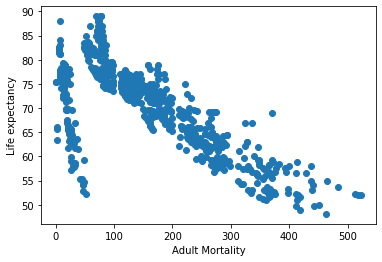

In [23]:
#LINEAR REGRESSION Starts
#Defining the dependent and independent variables
y = df['Life expectancy']
x1 = df['Adult Mortality']

#Exploring the data
plt.scatter(x1,y)
plt.xlabel('Adult Mortality',fontsize=10)
plt.ylabel('Life expectancy',fontsize=10)
plt.show()

In [38]:
#Adding a constant
c = sm.add_constant(x1)

#Performing Regression
results = sm.OLS(y,c).fit()

#Viewing Regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1164.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          4.28e-165
Time:                        18:48:55   Log-Likelihood:                -2877.3
No. Observations:                 915   AIC:                             5759.
Df Residuals:                     913   BIC:                             5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.3071      0.324    247.575      0.000      79.671      80.944
Adult Mortality    -0.0600      0.002    -34.111      0.000      -0.063      -0.057
==============================================================================
Omnibus:                      241.458   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              687.582
Skew:                          -1.320   Prob(JB):                    4.94e-150
Kurtosis:                       6.326   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#under-five deaths = -0.0605 * Total expenditure + (80.3360)
#LINEAR REGRESSION Ends

In [24]:
#MULTI-LINEAR REGRESSION Starts
#Taking the independent variables in x and dependent in y
x = df[['Polio','Schooling', 'infant deaths']]
y = df['New Status']

#Train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y)

#Fit the data into the model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

print("intercept:", mlr.intercept_)
print("coefficients:")
list(zip(x,mlr.coef_))

intercept: 3.012201242399035
coefficients:


[('Polio', -0.0045168797660721125),
 ('Schooling', -0.06981335105262285),
 ('infant deaths', 7.980155723104343e-05)]

In [25]:
#Calculate the predicted values of the dependent vairable with respect to the independent variables
y_pred_mlr = mlr.predict(x_test)
#print("predicted values of y: {}".format(y_pred_mlr)
print(y_pred_mlr[:20])

[2.33936496 1.85706891 1.95192338 1.96655586 1.59462457 1.96461987
 1.8506727  1.85906519 1.8866583  1.75395145 2.30543012 2.08260189
 1.84593717 1.86509057 1.48990454 1.78646574 1.21442375 1.99545184
 1.44858873 2.11898894]


In [26]:
#Fetch the Actual value and Predicted value 
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(20)
#MULTI-LINEAR REGRESSION Ends

,Actual value,Predicted value
589,2,2.339365
653,2,1.857069
658,2,1.951923
701,2,1.966556
484,1,1.594625
889,2,1.964620
96,2,1.850673
146,2,1.859065
333,2,1.886658
436,2,1.753951


In [27]:
#POLYNOMIAL REGRESSION Starts
polydata = df.copy()
polydata.describe()

,Year,New Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...,916.000000,916.000000,916.000000,916.000000,916.000000,9.160000e+02,916.000000,916.000000,916.000000,916.000000
mean,2013.001092,1.825328,71.236550,151.259825,25.278384,4.079269,783.308419,82.703537,1614.117904,40.875655,...,71.425218,8.917489,85.572598,0.827620,8942.621934,1.369128e+07,4.597598,4.623253,0.685060,12.455731
std,1.414599,0.379894,8.469989,105.734610,90.964654,4.104591,2249.908387,23.501441,8321.891180,20.592955,...,22.458701,20.284728,20.641089,1.797926,15318.750021,5.006847e+07,4.158077,4.179611,0.152198,2.861163
min,2011.000000,1.000000,48.100000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,...,3.000000,1.870000,2.000000,0.100000,12.277330,4.100000e+01,0.100000,0.100000,0.323000,4.800000
25%,2012.000000,2.000000,65.500000,69.000000,0.000000,0.040000,0.000000,81.000000,0.000000,22.700000,...,65.000000,5.370000,83.000000,0.100000,846.545926,4.824502e+05,1.500000,1.500000,0.565000,10.700000
50%,2013.000000,2.000000,73.500000,138.000000,2.000000,2.885000,62.321748,92.000000,15.000000,46.600000,...,76.000000,9.120000,94.000000,0.100000,4239.975941,4.261624e+06,3.400000,3.400000,0.712000,12.700000
75%,2014.000000,2.000000,76.700000,219.000000,18.000000,7.535000,500.354470,97.000000,272.000000,59.300000,...,87.000000,10.290000,97.000000,0.500000,7598.694073,1.533742e+07,6.700000,6.600000,0.797000,14.200000
max,2015.000000,2.000000,89.000000,522.000000,1100.000000,17.310000,19479.911610,99.000000,133802.000000,77.600000,...,99.000000,591.000000,99.000000,15.700000,119172.741800,1.293859e+09,26.900000,27.700000,0.948000,20.400000


In [29]:
linear_reg = LinearRegression()
x = polydata.GDP.values.reshape(-1,1)
y = polydata['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

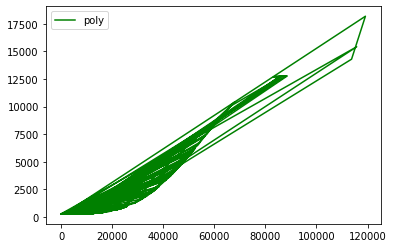

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
polynomial_regression = PolynomialFeatures(degree = 6)    
x_polynomial = polynomial_regression.fit_transform(x)

linear_reg2 = LinearRegression()
linear_reg2.fit(x_polynomial,y)

y_head = linear_reg2.predict(x_polynomial)

plt.plot(x,y_head,color="green",label="poly")
plt.legend()
plt.show()

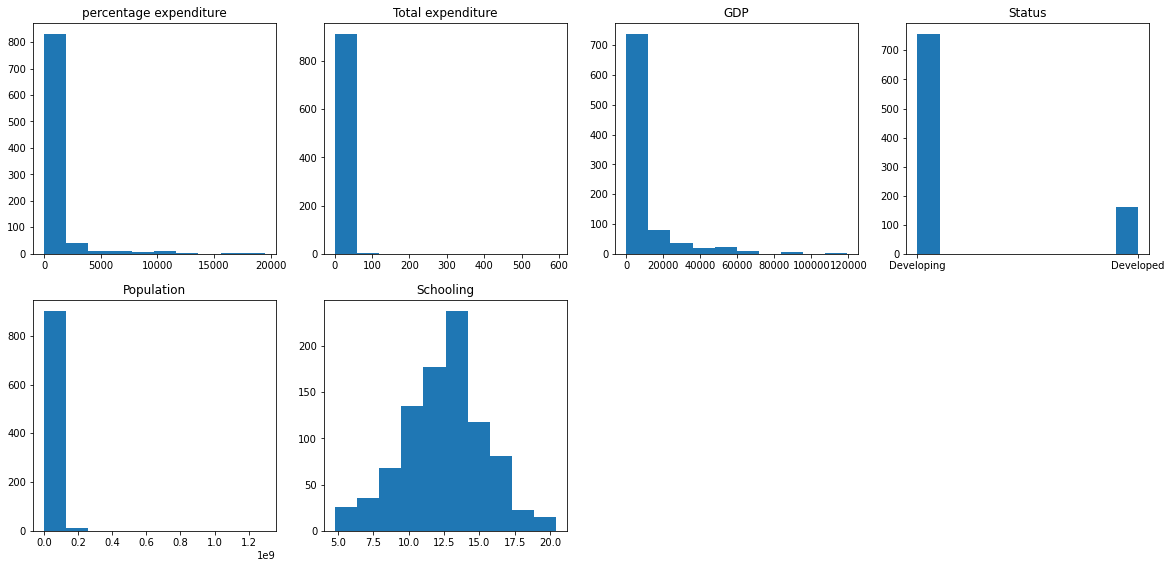

In [32]:
#Visualize the different data attributes using bar graph
plot_list = ['percentage expenditure', 'Total expenditure', 'GDP', 'Status', 'Population', 'Schooling']
plt.figure(figsize=(20, 45))

for col_names in plot_list:
    
    plt.subplot(9, 4, (plot_list.index(col_names)+1))
    plt.hist(df[col_names])
    plt.title(col_names)
    
plt.show()

Text(0, 0.5, 'Schooling')

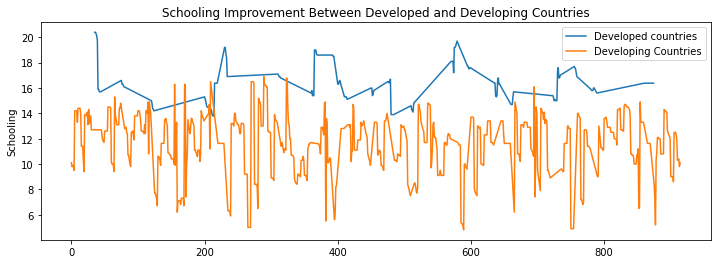

In [53]:
aa = df[df["Status"] == "Developed"]

ba = df[df["Status"] == "Developing"]

plt.figure(figsize = (12, 4))
plt.plot(aa['Schooling'])
plt.plot(ba['Schooling'])
plt.legend(["Developed countries", "Developing Countries"])
plt.title("Schooling Improvement Between Developed and Developing Countries")
plt.ylabel("Schooling")